In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Importing File through pandas

In [2]:
data = pd.read_excel('D:/TopMentor/batch49-16may/Historical Heart Attack .xlsx', sheet_name = 'heart')
desc = pd.read_excel('D:/TopMentor/batch49-16may/Historical Heart Attack .xlsx', sheet_name = 'Data Dict')

In [3]:
desc

,Columns,Descriptions
0,Age,Age of the patient
1,Sex,Sex of the patient
2,exang,exercise induced angina (1 = yes; 0 = no)
3,ca,number of major vessels (0-3)
4,cp,Chest Pain type chest pain type
5,Value 1,typical angina
6,Value 2,atypical angina
7,Value 3,non-anginal pain
8,Value 4,asymptomatic
9,trtbps,resting blood pressure (in mm Hg)


In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data cleaning, Data Wrangling
### Checking Duplicate Values

In [5]:
data_duplicated_row = data[data.duplicated()]
print(data_duplicated_row.shape)

(1, 14)


### Cleaning Duplicate Values

In [6]:
New_data = data.drop_duplicates()
New_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Checking Outlier

C:\Users\prajw\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

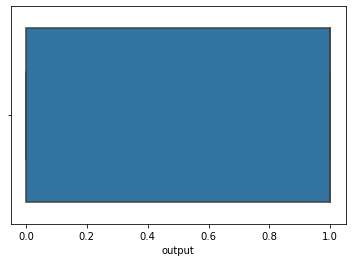

In [7]:
sns.boxplot(New_data['output'])

### No Outlier

In [8]:
# sns.boxplot(New_data['age'])
# sns.boxplot(New_data['sex'])
# sns.boxplot(New_data['cp'])
# sns.boxplot(New_data['restecg'])
# sns.boxplot(New_data['exng'])
# sns.boxplot(New_data['slp'])

### Outliers

In [9]:
# sns.boxplot(New_data['trtbps'])
# sns.boxplot(New_data['chol'])
# sns.boxplot(New_data['fbs'])
# sns.boxplot(New_data['thalachh'])
# sns.boxplot(New_data['oldpeak'])
# sns.boxplot(New_data['caa']
# # sns.boxplot(New_data['thall'])

### Removing of Outlier using IQR (Inter Quartile Range) method

In [10]:
Q1 = New_data.quantile(0.25)  # Quartile 1 (i.e 25%)
Q1

age          48.00
sex           0.00
cp            0.00
trtbps      120.00
chol        211.00
fbs           0.00
restecg       0.00
thalachh    133.25
exng          0.00
oldpeak       0.00
slp           1.00
caa           0.00
thall         2.00
output        0.00
Name: 0.25, dtype: float64

In [11]:
Q3 = New_data.quantile(0.75) # Quartile 3 (i.e 75%)
Q3

age          61.00
sex           1.00
cp            2.00
trtbps      140.00
chol        274.75
fbs           0.00
restecg       1.00
thalachh    166.00
exng          1.00
oldpeak       1.60
slp           2.00
caa           1.00
thall         3.00
output        1.00
Name: 0.75, dtype: float64

In [12]:
# Taking IQR 
IQR = Q3 - Q1
IQR

age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64

### Creating new data set and removing the Outlier using Upper threshold and lower threshold values

In [13]:
New_data = New_data[~(New_data < (Q1 - 1.5 * IQR)) | (New_data > (Q3 + 1.5 * IQR))]

In [14]:
New_data['thalachh'] = New_data.thalachh.ffill()
New_data['thall'] = New_data.thall.ffill()
New_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Feature Selection

In [15]:
Person_corr = New_data.corr()
Person_corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.387968,0.093216,0.206040,-0.164124,0.302261,0.064771,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.039911,0.143460,0.098322,-0.032990,0.113060,0.207647,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.289049,-0.392937,-0.146692,0.116854,-0.195356,-0.161022,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.056223,0.068526,0.194600,-0.122873,0.099248,0.062030,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.007425,0.064099,0.050086,0.000417,0.086878,0.089575,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.011888,0.024729,0.004514,-0.058654,0.144935,-0.025371,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.051896,-0.068807,-0.056251,0.090402,-0.083112,-0.017132,0.134874
thalachh,-0.387968,-0.039911,0.289049,-0.056223,-0.007425,-0.011888,0.051896,1.000000,-0.392644,-0.349496,0.385440,-0.240723,-0.122689,0.416492
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.392644,1.000000,0.286766,-0.256106,0.125377,0.214651,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.349496,0.286766,1.000000,-0.576314,0.236560,0.207503,-0.429146


<AxesSubplot:>

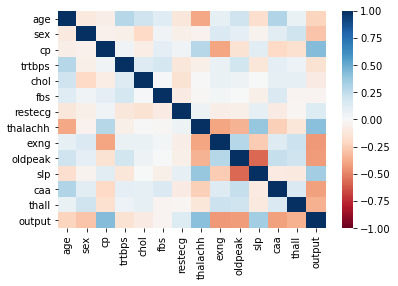

In [16]:
sns.heatmap(Person_corr, vmax=1, vmin=-1, cmap='RdBu')

### Model Creation

In [17]:
X = New_data.drop("output", axis = 'columns')

In [18]:
y = New_data.output

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Algorithm Creation

In [20]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, y_train)

RandomForestClassifier()

### Checking Score of above Algorithm

In [23]:
KNN_model.score(X_train, y_train)

0.7759336099585062

In [24]:
DTC_model.score(X_train, y_train)

1.0

In [25]:
RFC_model.score(X_train, y_train)

1.0

### Predicting X_Test

In [26]:
Prediction = DTC_model.predict(X_test)
Prediction

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

### Creating New DataFrame with Actual Values and Predicted Values.

In [27]:
Final_Data = pd.DataFrame({'Actual Values' : y_test, 'Predicted' : Prediction})
Final_Data

,Actual Values,Predicted
174,0,0
88,1,1
163,1,1
243,0,0
110,1,0
...,...,...
194,0,0
78,1,1
248,0,1
220,0,0
